# Import required libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
import seaborn as sns

# Import data into Python environment

In [22]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [23]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [24]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [25]:
df.shape

(2224, 11)

In [26]:
df.size

24464

# Provide the trend chart for the number of complaints at monthly and daily granularity level

In [29]:
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df['Month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['Date']=pd.to_datetime(df['Date_month_year']).dt.day

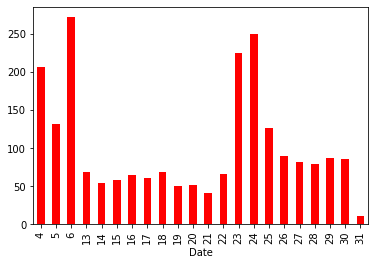

In [30]:
df.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar', color='red')
plt.show()

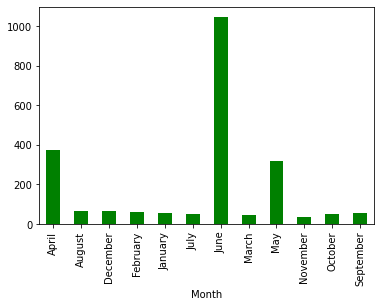

In [32]:
df.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar', color='green')
plt.show()                                                     

# Provide a table with the frequency of complaint types

In [34]:
df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Comcast Charging Fee without warning,1
1837,Xfinity: Bogus modem charges,1
1838,Failure to show for an appointment and lying,1
1839,Comcast Excessive Overages,1


# Which complaint types are maximum

In [35]:
df['Customer Complaint'].value_counts()

Comcast                                         83
Comcast Internet                                18
Comcast Data Cap                                17
comcast                                         13
Comcast Data Caps                               11
                                                ..
Comcast Charging Fee without warning             1
Xfinity: Bogus modem charges                     1
Failure to show for an appointment and lying     1
Comcast Excessive Overages                       1
Comcast Internet and cable deals                 1
Name: Customer Complaint, Length: 1841, dtype: int64

#  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [36]:
df['Status'] = df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

# Provide state wise status of complaints in a stacked bar chart

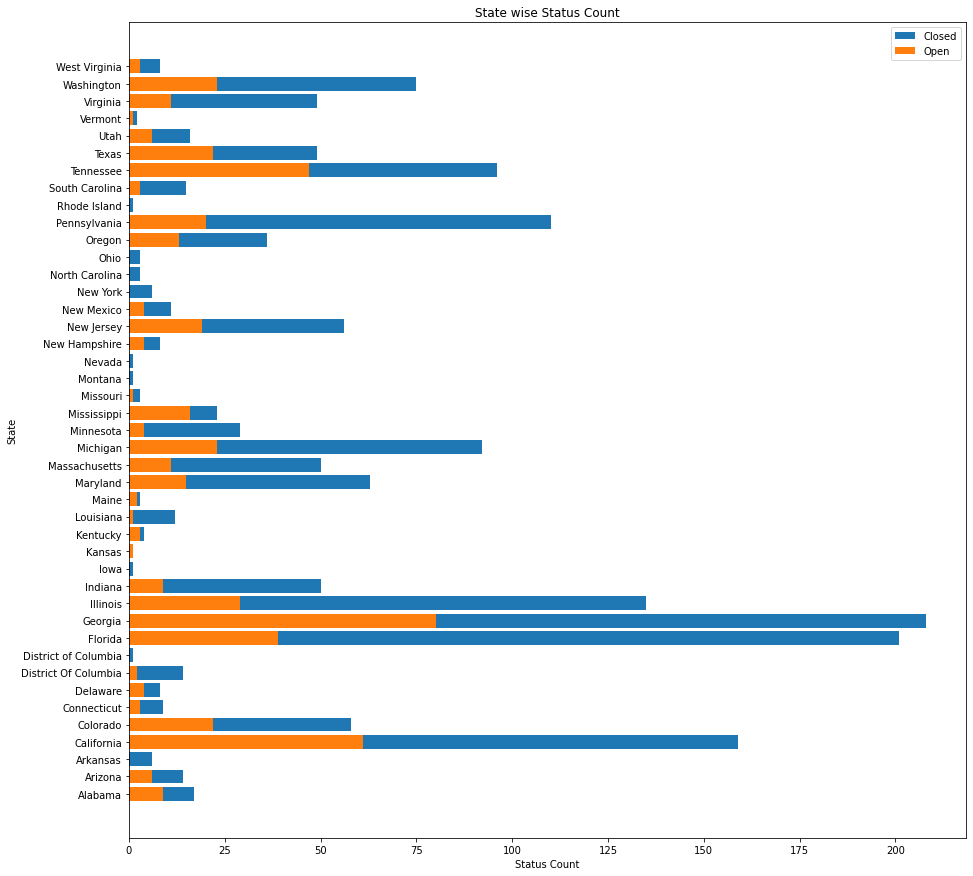

In [49]:
open = df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
closed = df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig = plt.figure(figsize=(15,15))
plt.barh(closed.State, closed.Status)
plt.barh(open.State, open.Status)
plt.ylabel("State")
plt.xlabel("Status Count")
plt.legend(["Closed", "Open"])
plt.title("State wise Status Count")
plt.show()


# Which state has the maximum complaints

In [50]:
df.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: Customer Complaint, dtype: int64

# Which state has the highest percentage of unresolved complaints

In [55]:
State_unsolved = df.loc[df['Status']=='Open',['State']].value_counts()
State_unsolved/State_unsolved.sum()*100

State               
Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Colorado                 4.255319
Texas                    4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Virginia                 2.127660
Massachusetts            2.127660
Indiana                  1.740812
Alabama                  1.740812
Utah                     1.160542
Arizona                  1.160542
Minnesota                0.773694
New Hampshire            0.773694
New Mexico               0.773694
Delaware                 0.773694
Kentucky                 0.580271
South Carolina           0.580271
Connecticut              0.580271
West Virginia            0.580271
Maine                    0.

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [61]:
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64